In [89]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 기본값으로 설정 (처음 5개와 마지막 5개 행만 출력)
pd.reset_option('display.max_rows')

# 출력 포맷 설정 (소수점 4자리까지)
pd.options.display.float_format = '{:.4f}'.format

import platform
import seaborn as sns

import matplotlib.pyplot as plt

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

apple gothic


In [90]:
from modules import modeling as ml

## 데이터 로드

In [91]:
fname = '../data/5_데이터셋생성_재무+거시+수익성_최종.csv'

dataset = pd.read_csv(fname, dtype={'거래소코드' : 'object'}).set_index('거래소코드')
dataset.shape

(1385, 225)

In [92]:
dataset.head(2)

,회사명,회계년도,상장일,상장폐지일,결산년도,상장년도,market,자산,유형자산,유동자산,재고자산,자본,매출액,매출원가,판매비와 관리비(물류원가 등 포함),기타(영업)비용,당기제조원가,급여,퇴직급여,상품매출원가,제품매출원가,감가상각비,대손상각비,개발비상각,기타무형자산상각비,외환차익1,외화환산이익1,외환차손1,외화환산손실1,외환차익2,외화환산이익2,외환차손2,외환환산손실2,무형자산,건설중인자산,토지,자본잉여금,이익잉여금(결손금),미처분이익잉여금(결손금),기타임의적립금,(연차배당),(중간배당),배당금지급(-),단기차입금,매입채무 및 기타유동채무,매출채권 및 기타유동채권,비유동자산,사채,유동금융자산,유동부채,유동성장기부채,장기매입채무 및 기타비유동채무,장기매출채권 및 기타비유동채권,장기차입금,현금및현금성자산,영업활동으로 인한 현금흐름,유형자산의 증가,무형자산의 증가,연구개발비,종업원수,비유동부채,부채,유형자산의증가,유형자산의감소,(투자활동으로 인한 현금유출액),투자활동으로 인한 현금유입액,자본금,관계기업 등 지분관련 투자자산,영업손익,이자보상배율,년도차,자산_전기,자산증가율,유형자산_전기,유형자산증가율,유동자산_전기,유동자산증가율,재고자산_전기,재고자산증가율,자본_전기,자본증가율,매출액_전기,매출액증가율,자산평균,유형자산평균,무형자산_전기,무형자산평균,건설중인자산_전기,건설중인자산평균,토지_전기,토지평균,자본평균,총자산회전율,감가상각율,배당률,판관비체크,순외환손익대비매출액,매출원가대비매출액,당기총제조비용,재고조정중의고정비,고정비,총비용,변동비,변동비대비매출액,고정비대비매출액,인건비대비매출액,인건비대비영업총비용,1인당매출액,1인당인건비,재고자산평균,비유동자산_전기,비유동자산평균,매출채권 및 기타유동채권평균,장기매출채권 및 기타비유동채권평균,매입채무 및 기타유동채무평균,장기매입채무 및 기타비유동채무평균,주주이익(버핏),순운전자본(민식),유무형자산,영업현금흐름대비투하자본,ROTCE현금흐름대체,유형자산대비현금흐름,유무형자산대비현금흐름,매출대비고정자산,단기차입금_전기,단기차입금평균,장기차입금_전기,장기차입금평균,유동비율,현금비율,당좌비율,자기자본비율,비유동비율,부채비율,유동부채비율,비유동부채비율,비유동장기적합률,차입금의존도,매출채권대비매입채무,순운전자본,순운전자본대비총자본,차입금대비매출액,매출채권대비매입채무_before,영업활동현금흐름 대 총자산,영업활동현금흐름 대 매출액,투자안정성비율,영업활동현금흐름 대 투자활동현금지출,경영자산회전율분모,매출채권,매입채무,차입금,경영자산회전율분모_전기,매출채권_전기,매입채무_전기,차입금_전기,부채_전기,자본금_전기,영업활동현금흐름 대 총부채,자기자본회전율,자본금회전율,경영자산회전율,비유동자산회전율,유형자산회전율,재고자산회전율,매출채권회전율,매입채무회전율,차입금 대 매출액,label,시가총액,상장주식수,배당수익률,DATE,DGS10,DGS1,DGS6MO,T10Y2Y,WTI_oil,Dubai_oil,realGDP_usa,real_PCE,Core_PCE,CPI_sticky,Core_CPI,manuf_PMI(R),non_manuf_PMI(R),manuf_GB,non_manuf_GB,Equip_inv,TB_rtn(1y),TB_rtn(10y),IR_sm,DXY,CB_spread(AA-),CB_spread(BBB-),경제고통지수,경상수지,수입금액지수,수입물량지수,수출금액지수,수출물량지수,미국수입금액,중국수입금액,미국수출금액,중국수출금액,실업률,실업률_증감,소비자물가상승률,근원물가상승률,근원물가상승률_식품에너지제외,GDP_growth,CLI(경기선행),CCI(경기동행),NSI(=뉴스심리지수),기업실사BSI_실적,기업실사BSI_전망,year,month,매출액정상영업이익률,매출액순이익률,매출액총이익률,총자본순이익률,총자본사업이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률
거래소코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000040,케이알모터스(주),2012/12,1976/05/25,NaN,2012,1976,KOSPI,119327267.0000,55810192.0000,61684604.0000,24763334.0000,60797171.0000,97926654.0000,92177389.0000,11948008.0000,0.0000,0.0000,2579833.0000,350950.0000,0.0000,0.0000,35985.0000,1248799.0000,0.0000,650714.0000,155998.0000,0.0000,470896.0000,1310924.0000,0.0000,0.0000,0.0000,0.0000,1118203.0000,0.0000,42542501.0000,3884892.0000,7235571.0000,12088682.0000,0.0000,0.0000,0.0000,0.0000,10401663.0000,28964045.0000,26201155.0000,57642663.0000,0.0000,100000.0000,43762954.0000,0.0000,407646.0000,342768.0000,0.0000,10236751.0000,-4565749.0000,937241.0000,42700.0000,0.0000,249.0000,14767142.0000,58530096.0000,937241.0000,21084.0000,992041.0000,464863.0000,59670690.0000,0.0000,-6198743.0000,-6.4700,1.0000,133337774.0000,-10.5075,57761033.0000,-3.3774,73022140.0000,-15.5262,24384487.0000,1.5536,68764654.0000,-11.5866,127720215.0000,-23.3272,126332520.5000,56785612.5000,1804381.0000,1461292.0000,0.0000,0.0000,42542501.0000,42542501.0000,64780912.5000,0.7752,0.0972,-0.0000,True,-13.6075,94.1290,14842806.0000,7635041.5537,11035931.0537,104125397.0000,93089465.9463,95.0604,11.2696,2.9928,24.5295,393280.0000,10361.0000,24573910.5000,60315635.0000,58979149.0000,26201155.0000,342768.0000,28964045.0000,407646.0000,-4858991.0000,51117833.5000,58246904.5000,0.0000,0.0000,0.0000,0.0000,0.0000,10304725.0000,10353194.0000,0.0000,0.0000,140.9516,23.3914,23.6199,50.9499,94.8114,96.2711,71.9819,24.2892,76.2829,8.7169,90.3725,17921650.0000,15.0189,10.5724,90.3725,0.0000,0.0000,0.0000,0.0000,119327267.0000,26543923.0000,29371691.0000,10401663.0000,133337774.0000,33214201.0000,35842471.0000,10304725.0000,64573121.0000,59670690.0000,0.0000,1.5117,1.6411,0.7752,1.6604,1.7245,3.9850,3.2774,3.0032,10.5724,0.0000,58954641.2260,119341379.0000,-0.0000,2012-12-01,1.7274,0.1675,0.1282,1.4629,94.2008,3.3083,2.2891,1.3673,1.8500,-139.7270,0.7093,50.700

## 피처 선택

In [93]:
dataset['주식시장'] = dataset['market']

# 음수 -> 양수로 변환
dataset['배당금지급(-)'] = -dataset['배당금지급(-)']

cols_info = ['회사명', '회계년도', '주식시장']
col_y = 'label'

# 최종 피처 : standard scaling -> describe 기준 10개
cols_features = ['순운전자본대비총자본', '비유동장기적합률', '자기자본순이익률', '당좌비율', '총자본정상영업이익률', '자본금회전율',
        '총자산회전율', '배당금지급(-)', '미처분이익잉여금(결손금)', '영업손익']

cols_remain = cols_info+cols_features+[col_y]
dataset = dataset[cols_remain]
dataset.shape

(1385, 14)

In [94]:
dataset[['배당금지급(-)']].describe()

,배당금지급(-)
count,1385.0000
mean,4394716.2202
std,37742389.5671
min,-0.0000
25%,0.0000
50%,0.0000
75%,1030071.0000
max,1212011000.0000


In [95]:
len(cols_info), len(cols_features), len([col_y])

(3, 10, 1)

In [96]:
dataset.columns

Index(['회사명', '회계년도', '주식시장', '순운전자본대비총자본', '비유동장기적합률', '자기자본순이익률', '당좌비율',
       '총자본정상영업이익률', '자본금회전율', '총자산회전율', '배당금지급(-)', '미처분이익잉여금(결손금)', '영업손익',
       'label'],
      dtype='object')

## 전처리

### 범주형 변수 : 원핫 인코딩

In [97]:
# 범주형 변수
cols_cate = ['manuf_GB', 'non_manuf_GB', 'market']
cols_cate_ds = dataset.columns[dataset.columns.isin(cols_cate)]
cols_cate_ds

Index([], dtype='object')

In [98]:
if 'market' in dataset.columns:
    # KOSDAQ -> 0 / KOSPI -> 1
    dataset['market'] = dataset['market'].map(lambda x: 0 if x == 'KOSDAQ' else 1)

if 'manuf_GB' in dataset.columns:
    # 불황 -> 0 / 호황 -> 1
    dataset['manuf_GB'] = dataset['manuf_GB'].map(lambda x: 0 if x == '불황' else 1)

if 'non_manuf_GB' in dataset.columns:
    # 불황 -> 0 / 호황 -> 1
    dataset['non_manuf_GB'] = dataset['non_manuf_GB'].map(lambda x: 0 if x == '불황' else 1)

# 범주형 변수 인코딩 확인
dataset[dataset.columns[dataset.columns.isin(cols_cate)]]

""
거래소코드
000040
000050
000070
000150
000180
...
900260
950130
950140


### train test split

In [99]:
train = dataset[pd.to_datetime(dataset['회계년도']).dt.year<2020]

train.shape

(1187, 14)

In [100]:
test = dataset[pd.to_datetime(dataset['회계년도']).dt.year>2019]

test.shape

(198, 14)

### 이상치 처리 : 윈저라이징

In [101]:
from scipy.stats.mstats import winsorize
import scipy.stats as stats

train_winsorized = train.copy()

#### 상위 1%

In [102]:
# 상위 1%
cols_upper = ['자산', '유형자산', '유동자산', '재고자산', '자본', '매출액', '매출원가', '판매비와 관리비(물류원가 등 포함)', '당기제조원가', \
            '급여', '퇴직급여', '감가상각비', '대손상각비', '기타무형자산상각비', '외환차익1', '외화환산이익1', '외환차손1','외화환산손실1',\
            '무형자산', '건설중인자산', '토지', '자본잉여금','기타임의적립금','단기차입금',\
            '매입채무 및 기타유동채무', '매출채권 및 기타유동채권','매입채무 및 기타유동채무', '매출채권 및 기타유동채권', '비유동자산',\
            '사채', '유동금융자산', '유동부채', '유동성장기부채', '장기매입채무 및 기타비유동채무', '장기매출채권 및 기타비유동채권', \
            '장기차입금', '현금및현금성자산', '유형자산의 증가', '무형자산의 증가', '연구개발비', '종업원수', '비유동부채', '부채', \
            '유형자산의증가', '유형자산의감소', '(투자활동으로 인한 현금유출액)', '투자활동으로 인한 현금유입액', '자본금', \
            '관계기업 등 지분관련 투자자산', '자산증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '매출액증가율',\
            '총자산회전율', '감가상각율', '당기총제조비용','재고조정중의고정비', '고정비','총비용', '변동비','변동비대비매출액',\
            '고정비대비매출액', '인건비대비매출액','1인당매출액', '1인당인건비', '순운전자본(민식)', '유무형자산', '영업현금흐름대비투하자본',\
            'ROTCE현금흐름대체',  '유형자산대비현금흐름',  '유무형자산대비현금흐름','매출대비고정자산', '유동비율', '현금비율', '당좌비율', \
            '비유동비율', '부채비율', '유동부채비율', '비유동부채비율', '비유동장기적합률', '매출채권대비매입채무','순운전자본대비총자본', \
            '차입금대비매출액', '영업활동현금흐름 대 총자산', '영업활동현금흐름 대 매출액', '투자안정성비율', \
            '영업활동현금흐름 대 투자활동현금지출', '매출채권', '매입채무', '차입금', '영업활동현금흐름 대 총부채', '자기자본회전율', \
            '자본금회전율', '경영자산회전율', '비유동자산회전율', '유형자산회전율', '재고자산회전율', '매출채권회전율', '매입채무회전율',\
            '시가총액', '배당수익률', '배당금지급(-)']

cols_upper_ds = dataset.columns[dataset.columns.isin(cols_upper)]
cols_upper_ds

Index(['순운전자본대비총자본', '비유동장기적합률', '당좌비율', '자본금회전율', '총자산회전율', '배당금지급(-)'], dtype='object')

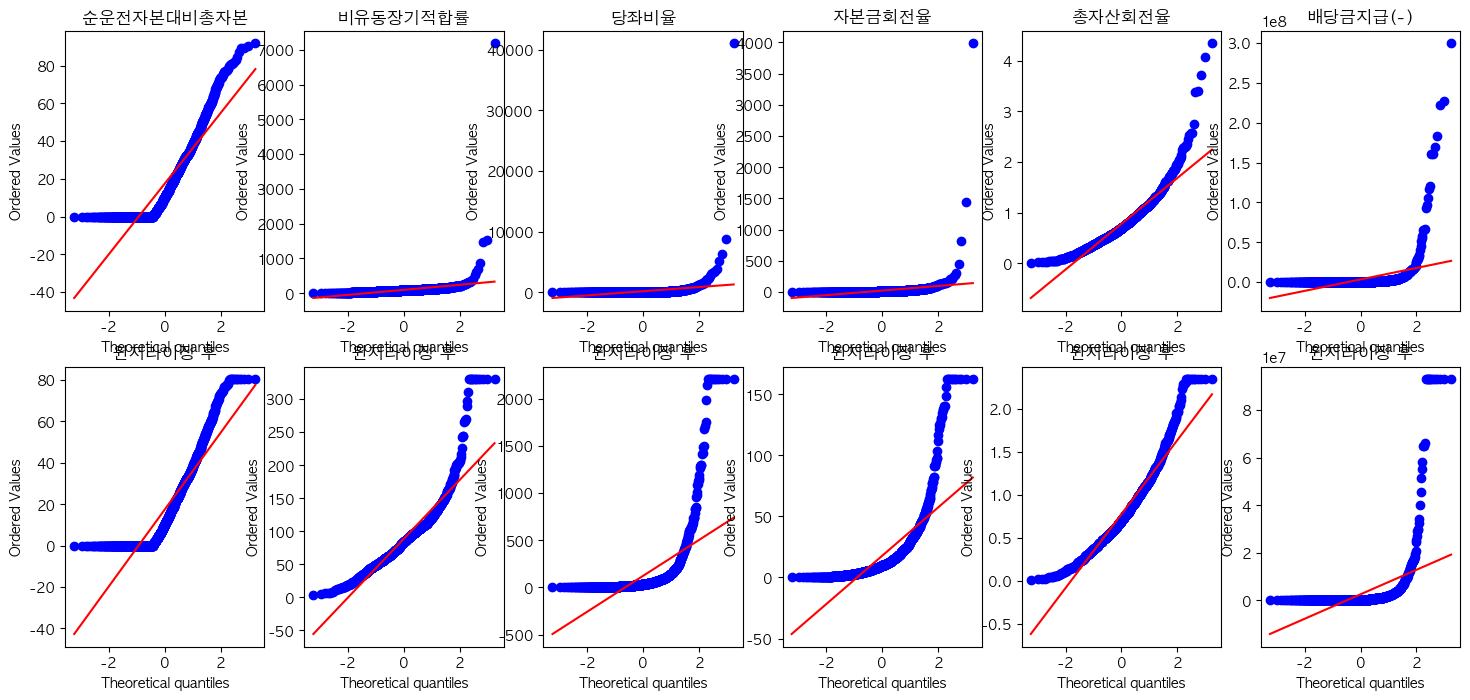

In [103]:
# 상위 1% -> 99% 백분위값으로 대체
train_winsorized[cols_upper_ds] = train[cols_upper_ds].apply(lambda x: winsorize(x, limits=[0, 0.01]))

## histogram
col_n = len(cols_upper_ds)
row_n = 2

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(3*col_n, 3*row_n + 2))

for i, col in enumerate(cols_upper_ds):
    stats.probplot(train[col],dist=stats.norm, plot=ax[0, i])
    ax[0, i].set_title(col)

    stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1, i])
    ax[1, i].set_title('윈저라이징 후')

plt.show()

#### 하위 0.75%, 상위 0.25%

In [104]:
# 하위 0.75%, 상위 0.25%, 
cols_ul1_l = [ '영업손익' ]

cols_ul1_l_ds = dataset.columns[dataset.columns.isin(cols_ul1_l)]
cols_ul1_l_ds

Index(['영업손익'], dtype='object')

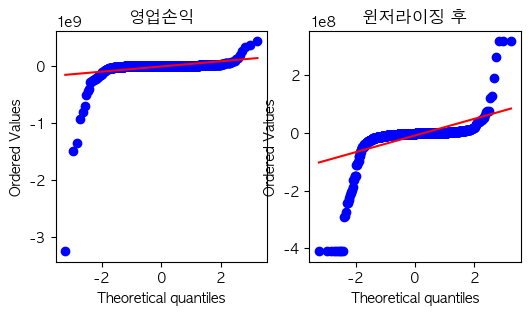

In [105]:
cols_winsorizing = cols_ul1_l_ds

# 하위 0.75%, 상위 0.25%를 각각 0.75%, 99.75% 백분위 값으로 대체)
train_winsorized[cols_winsorizing] = train[cols_winsorizing].apply(lambda x: winsorize(x, limits=[0.0075, 0.0025]))

## histogram
col_n = len(cols_winsorizing)
row_n = 2

if col_n>2:
    fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(3*col_n, 3*row_n + 2))
elif col_n==1:
    fig, ax = plt.subplots(ncols=row_n, nrows=col_n, figsize=(6, 3))
for i, col in enumerate(cols_winsorizing):
    if col_n>2:
        stats.probplot(train[col],dist=stats.norm, plot=ax[0, i])
        ax[0, i].set_title(col)

        stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1, i])
        ax[1, i].set_title('윈저라이징 후')
    elif col_n==1:
        stats.probplot(train[col],dist=stats.norm, plot=ax[0])
        ax[0].set_title(col)

        stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1])
        ax[1].set_title('윈저라이징 후')

plt.show()

#### 하위 0.25%, 상위 0.75%

In [106]:
# 하위 0.25% , 상위 0.75%
cols_ul1_u = ['이익잉여금(결손금)', '미처분이익잉여금(결손금)', '영업활동으로 인한 현금흐름','자본증가율','매출원가대비매출액', \
             '인건비대비영업총비용' ] 


cols_ul1_u_ds = dataset.columns[dataset.columns.isin(cols_ul1_u)]
cols_ul1_u_ds

Index(['미처분이익잉여금(결손금)'], dtype='object')

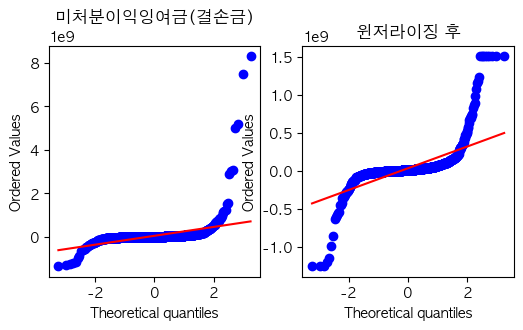

In [107]:
cols_winsorizing = cols_ul1_u_ds

# 하위 0.25%, 상위 0.75%를 각각 0.25%, 99.25% 백분위 값으로 대체)
train_winsorized[cols_winsorizing] = train[cols_winsorizing].apply(lambda x: winsorize(x, limits=[0.0025, 0.0075]))

## histogram
col_n = len(cols_winsorizing)
row_n = 2

if col_n>2:
    fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(3*col_n, 3*row_n + 2))
elif col_n==1:
    fig, ax = plt.subplots(ncols=row_n, nrows=col_n, figsize=(6, 3))
for i, col in enumerate(cols_winsorizing):
    if col_n>2:
        stats.probplot(train[col],dist=stats.norm, plot=ax[0, i])
        ax[0, i].set_title(col)

        stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1, i])
        ax[1, i].set_title('윈저라이징 후')
    elif col_n==1:
        stats.probplot(train[col],dist=stats.norm, plot=ax[0])
        ax[0].set_title(col)

        stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1])
        ax[1].set_title('윈저라이징 후')

plt.show()

#### 하위 0.5%, 상위 0.5%

In [108]:
# 하위 0.5%, 상위 0.5%
cols_ul1 = [ '순외환손익대비매출액',  '순운전자본', '매출액순이익률', '매출액총이익률', '총자본순이익률', '총자본사업이익률', '총자본정상영업이익률', '자기자본순이익률']

cols_ul1_ds = dataset.columns[dataset.columns.isin(cols_ul1)]
cols_ul1_ds

Index(['자기자본순이익률', '총자본정상영업이익률'], dtype='object')

In [109]:
cols_winsorizing = cols_ul1_ds

# 하위 0.5%, 상위 0.5%를 각각 0.5%, 99.5% 백분위 값으로 대체)
train_winsorized[cols_winsorizing] = train[cols_winsorizing].apply(lambda x: winsorize(x, limits=[0.005, 0.005]))

## histogram
col_n = len(cols_winsorizing)
row_n = 2

if col_n>2:
    fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(3*col_n, 3*row_n + 2))
elif col_n==1:
    fig, ax = plt.subplots(ncols=row_n, nrows=col_n, figsize=(6, 3))
for i, col in enumerate(cols_winsorizing):
    if col_n>2:
        stats.probplot(train[col],dist=stats.norm, plot=ax[0, i])
        ax[0, i].set_title(col)

        stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1, i])
        ax[1, i].set_title('윈저라이징 후')
    elif col_n==1:
        stats.probplot(train[col],dist=stats.norm, plot=ax[0])
        ax[0].set_title(col)

        stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1])
        ax[1].set_title('윈저라이징 후')

plt.show()

#### 하위 1%, 상위 1%

In [110]:
# 하위 1%, 상위 1%
cols_ul2 = [ '주주이익(버핏)']

cols_ul2_ds = dataset.columns[dataset.columns.isin(cols_ul2)]
cols_ul2_ds

Index([], dtype='object')

In [111]:
cols_winsorizing = cols_ul2_ds

# 하위 1%, 상위 1%를 각각 1%, 99% 백분위 값으로 대체)
train_winsorized[cols_winsorizing] = train[cols_winsorizing].apply(lambda x: winsorize(x, limits=[0.01, 0.01]))

## histogram
col_n = len(cols_winsorizing)
row_n = 2

if col_n>2:
    fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(3*col_n, 3*row_n + 2))
elif col_n==1:
    fig, ax = plt.subplots(ncols=row_n, nrows=col_n, figsize=(6, 3))
for i, col in enumerate(cols_winsorizing):
    if col_n>2:
        stats.probplot(train[col],dist=stats.norm, plot=ax[0, i])
        ax[0, i].set_title(col)

        stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1, i])
        ax[1, i].set_title('윈저라이징 후')
    elif col_n==1:
        stats.probplot(train[col],dist=stats.norm, plot=ax[0])
        ax[0].set_title(col)

        stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1])
        ax[1].set_title('윈저라이징 후')

plt.show()

#### 하위 1%

In [112]:
# 하위 1%
cols_lower = ['매출액정상영업이익률', '자기자본정상영업이익률'] 

cols_lower_ds = dataset.columns[dataset.columns.isin(cols_lower)]
cols_lower_ds

Index([], dtype='object')

In [113]:
cols_winsorizing = cols_lower_ds

# 하위 1% -> 1% 백분위값으로 대체
train_winsorized[cols_winsorizing] = train[cols_winsorizing].apply(lambda x: winsorize(x, limits=[0.01, 0.00]))

## histogram
col_n = len(cols_winsorizing)
row_n = 2

if col_n>2:
    fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(3*col_n, 3*row_n + 2))
elif col_n==1:
    fig, ax = plt.subplots(ncols=row_n, nrows=col_n, figsize=(6, 3))
for i, col in enumerate(cols_winsorizing):
    if col_n>2:
        stats.probplot(train[col],dist=stats.norm, plot=ax[0, i])
        ax[0, i].set_title(col)

        stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1, i])
        ax[1, i].set_title('윈저라이징 후')
    elif col_n==1:
        stats.probplot(train[col],dist=stats.norm, plot=ax[0])
        ax[0].set_title(col)

        stats.probplot(train_winsorized[col],dist=stats.norm, plot=ax[1])
        ax[1].set_title('윈저라이징 후')

plt.show()

#### 그 외 : 이상치 처리 X

In [114]:
# # 안함
# nothing = ['자기자본비율',  '차입금의존도', 'DGS10', 'DGS1', 'DGS6MO', 'T10Y2Y', 'WTI_oil', 'Dubai_oil', 'realGDP_usa', 'real_PCE',\
#            'Core_PCE', 'CPI_sticky', 'Core_CPI', 'manuf_PMI(R)', 'non_manuf_PMI(R)', 'Equip_inv', 'TB_rtn(1y)', 'TB_rtn(10y)', \
#            'IR_sm', 'DXY', 'CB_spread(AA-)', 'CB_spread(BBB-)', '경제고통지수', '경상수지', '수입금액지수', '수입물량지수', \
#             '수출금액지수', '수출물량지수', '미국수입금액', '중국수입금액', '미국수출금액', '중국수출금액', '실업률', '실업률_증감',\
#             '소비자물가상승률', '근원물가상승률', '근원물가상승률_식품에너지제외', 'GDP_growth', 'CLI(경기선행)', 'CCI(경기동행)',\
#              'NSI(=뉴스심리지수)', '기업실사BSI_실적', '기업실사BSI_전망']

# # 0이 너무 많아서 확인해봐야 함
# zero_feature = ['기타(영업)비용', '상품매출원가', '제품매출원가', '개발비상각']

### 스케일링

In [115]:
train_scaled = train.copy()
train_winsorized_scaled = train_winsorized.copy()

test_scaled = test.copy()

#### 스케일링 : log scaling

In [116]:
cols_log = [
    '자산', '유형자산', '유동자산', '매출액', '판매비와 관리비(물류원가 등 포함)', 
    '급여', '매출채권 및 기타유동채권', '비유동자산', '유동부채', '현금및현금성자산', 
    '부채', '자본금', '당기총제조비용', '고정비', '총비용', 
    '변동비', '1인당매출액', '1인당인건비', '순운전자본(민식)', '유무형자산', 
    '매출채권', '시가총액'
]

cols_log_ds = dataset.columns[dataset.columns.isin(cols_log)]
cols_log_ds

Index([], dtype='object')

In [117]:
df = train_winsorized_scaled

if len(cols_log_ds)>0:
    
    plt.figure(figsize=(16, 9))
    df[cols_log_ds].boxplot()
    plt.title('스케일링 전')
    plt.xticks(rotation=90)
    plt.show()

    # 로그 스케일링 (상용로그)
    train_scaled[cols_log_ds] = train_scaled[cols_log_ds].apply(np.log10)
    train_winsorized_scaled[cols_log_ds] = train_winsorized_scaled[cols_log_ds].apply(np.log10)
    test_scaled[cols_log_ds] = test_scaled[cols_log_ds].apply(np.log10)

    plt.figure(figsize=(16, 9))
    df[cols_log_ds].boxplot()
    plt.title('스케일링 후')
    plt.xticks(rotation=90)
    plt.show()

#### 스케일링 : [standard/minmax] scaling

In [118]:
cols_info, cols_cate_ds, cols_log_ds

(['회사명', '회계년도', '주식시장'], Index([], dtype='object'), Index([], dtype='object'))

In [119]:
train.columns

Index(['회사명', '회계년도', '주식시장', '순운전자본대비총자본', '비유동장기적합률', '자기자본순이익률', '당좌비율',
       '총자본정상영업이익률', '자본금회전율', '총자산회전율', '배당금지급(-)', '미처분이익잉여금(결손금)', '영업손익',
       'label'],
      dtype='object')

In [120]:
# 정보성 변수 + 범주형 변수 + 로그스케일링 변수 + target
cols_non_scaling = cols_info + cols_cate_ds.tolist() + cols_log_ds.tolist() + [col_y]
cols_non_scaling

['회사명', '회계년도', '주식시장', 'label']

In [121]:
# 스케일링 변수
cols_scaling_ds = train.drop(columns=cols_non_scaling).columns
cols_scaling_ds

Index(['순운전자본대비총자본', '비유동장기적합률', '자기자본순이익률', '당좌비율', '총자본정상영업이익률', '자본금회전율',
       '총자산회전율', '배당금지급(-)', '미처분이익잉여금(결손금)', '영업손익'],
      dtype='object')

In [122]:
""" standard scaling """
from sklearn.preprocessing import StandardScaler

# 윈저라이징 된 데이터로 fit한 스케일러 사용
scaler_std_winsorized = StandardScaler()
scaler_std_winsorized.fit(train_winsorized_scaled[cols_scaling_ds])
train_winsorized_scaled[cols_scaling_ds] = scaler_std_winsorized.transform(train_winsorized_scaled[cols_scaling_ds])

test_scaled_winsorized = test_scaled.copy()
test_scaled_winsorized[cols_scaling_ds] = scaler_std_winsorized.transform(test_scaled_winsorized[cols_scaling_ds])

# 윈저라이징 안한 데이터로 fit한 스케일러 사용
scaler_std = StandardScaler()
scaler_std.fit(train_scaled[cols_scaling_ds])
train_scaled[cols_scaling_ds] = scaler_std.transform(train_scaled[cols_scaling_ds])
test_scaled[cols_scaling_ds] = scaler_std.transform(test_scaled[cols_scaling_ds])

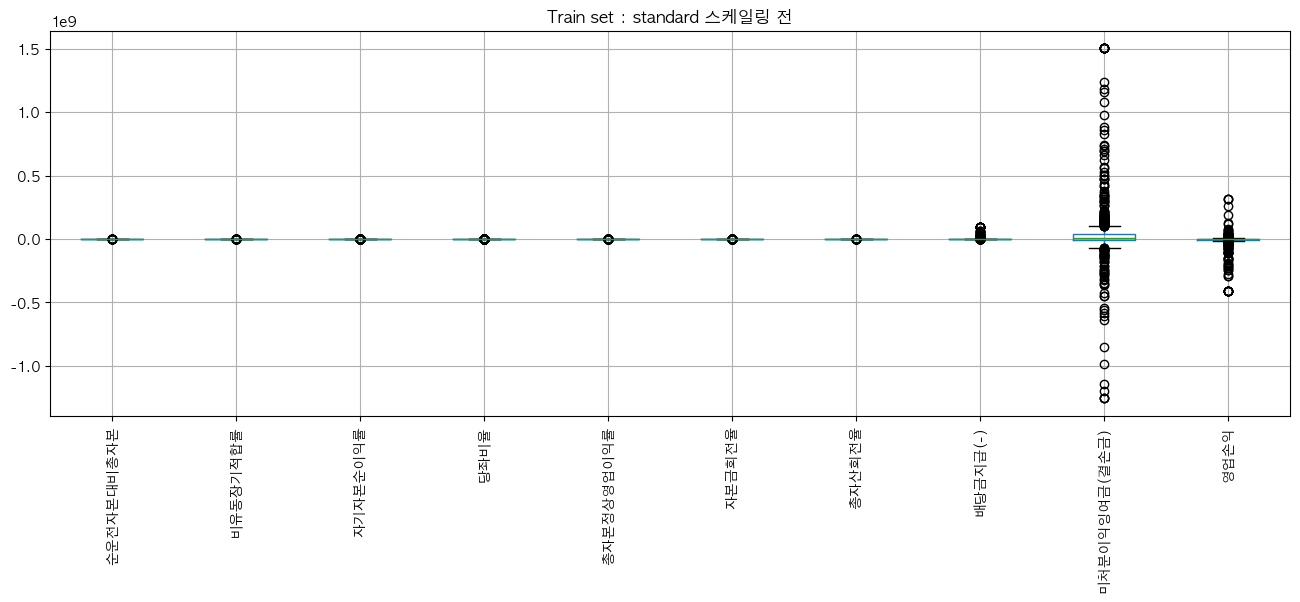

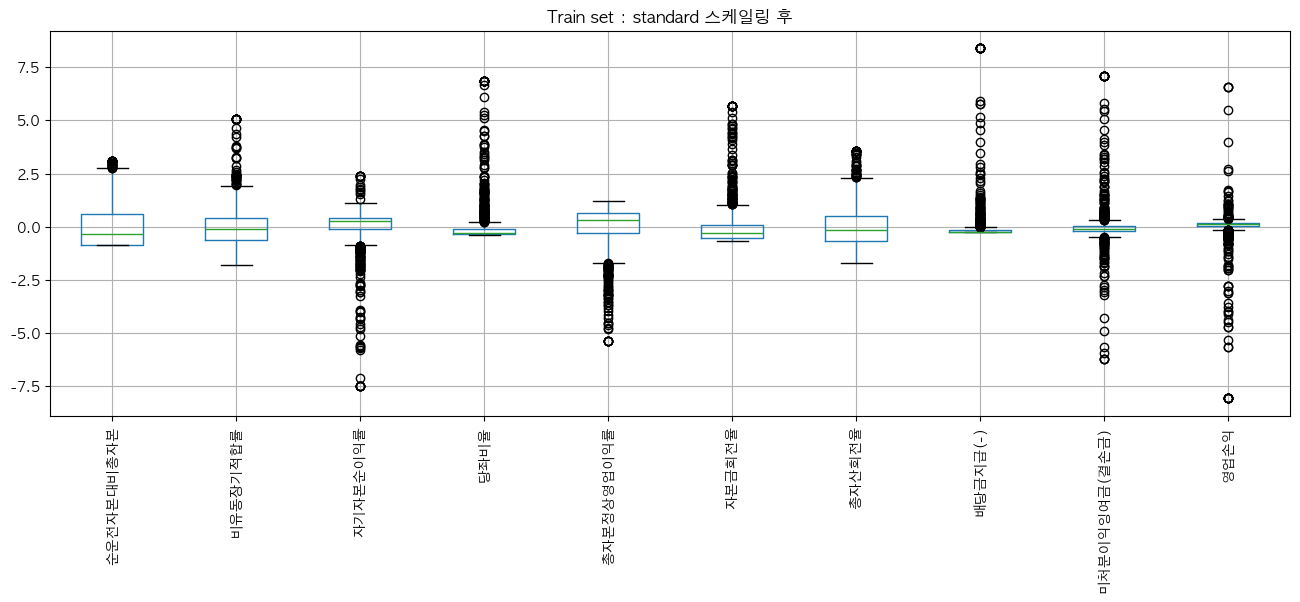

In [123]:
plt.figure(figsize=(16, 5))
train_winsorized[cols_scaling_ds].boxplot()
plt.xticks(rotation=90)
plt.title('Train set : standard 스케일링 전')
plt.show()

plt.figure(figsize=(16, 5))
train_winsorized_scaled[cols_scaling_ds].boxplot()
plt.xticks(rotation=90)
plt.title('Train set : standard 스케일링 후')
plt.show()

In [124]:
""" minmax scaling """
# from sklearn.preprocessing import MinMaxScaler

# # 데이터프레임 복사
# cols_mm = cols_scaling
# X_train_scaled_mm = X_train_scaled.copy()
# X_test_scaled_mm = X_test_scaled.copy()

# scaler_mm = MinMaxScaler()
# scaler_mm.fit(X_train_scaled_mm[cols_mm])

# X_train_scaled_mm[cols_mm] = scaler_mm.transform(X_train_scaled_mm[cols_mm])
# X_test_scaled_mm[cols_mm] = scaler_mm.transform(X_test_scaled_mm[cols_mm])

' minmax scaling '

## 모델링 및 성능평가

In [125]:
train_scaled.shape, train_winsorized_scaled.shape, test_scaled.shape, test_scaled_winsorized.shape

((1187, 14), (1187, 14), (198, 14), (198, 14))

In [126]:
# 피처만 추출
# 윈저라이징(O) + 스케일링

X_train = train_winsorized_scaled.drop(columns=cols_info+[col_y])
y_train = train_winsorized_scaled[col_y]

X_test = test_scaled_winsorized.drop(columns=cols_info+[col_y])
y_test = test_scaled_winsorized[col_y]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1187, 10), (1187,), (198, 10), (198,))

In [127]:
X_train.describe()

,순운전자본대비총자본,비유동장기적합률,자기자본순이익률,당좌비율,총자본정상영업이익률,자본금회전율,총자산회전율,배당금지급(-),미처분이익잉여금(결손금),영업손익
count,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000,1187.0000
mean,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
std,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004
min,-0.8600,-1.7937,-7.5136,-0.4050,-5.3785,-0.6959,-1.7269,-0.2343,-6.2114,-8.0748
25%,-0.8600,-0.6288,-0.0886,-0.3608,-0.3034,-0.5302,-0.6849,-0.2343,-0.1890,0.0525
50%,-0.3564,-0.1020,0.2688,-0.2970,0.3228,-0.3093,-0.1684,-0.2343,-0.1178,0.1386
75%,0.5855,0.3928,0.4286,-0.1218,0.6410,0.1002,0.5210,-0.1460,0.0188,0.1825
max,3.0945,5.0454,2.4009,6.8449,1.1852,5.6564,3.5447,8.3936,7.0966,6.5804


In [128]:
# # 피처만 추출
# # 윈저라이징(X) + 스케일링

# X_train = train_scaled.drop(columns=cols_info+[col_y])
# y_train = train_scaled[col_y]

# X_test = test_scaled.drop(columns=cols_info+[col_y])
# y_test = test_scaled[col_y]

# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [129]:
import modules.modeling as ml

names = ['lr', 'dt', 'svm', 'rf', 'xgb', 'lgbm', 'cat']
res = {}
for name in names:
    res[name] = ml.train(X_train, y_train, X_test, y_test, model_name=name)

results, results_cv = [], []
for key in res.keys():
    res[key]['results']['name'] = key
    results.append(res[key]['results'])

    res_cv = dict(res[key]['cv'].drop(columns='cf_matrix').mean())
    res_cv['name'] = key
    results_cv.append(res_cv)

[LightGBM] [Info] Number of positive: 409, number of negative: 778
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1187, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344566 -> initscore=-0.643011
[LightGBM] [Info] Start training from score -0.643011
[LightGBM] [Info] Number of positive: 327, number of negative: 622
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 949, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344573 -> initscore=-0.642980
[LightGBM] [Info] Start training from score -0.642980
[LightGBM] [Info] Numbe

In [131]:
X_test.describe()

,순운전자본대비총자본,비유동장기적합률,자기자본순이익률,당좌비율,총자본정상영업이익률,자본금회전율,총자산회전율,배당금지급(-),미처분이익잉여금(결손금),영업손익
count,198.0000,198.0000,198.0000,198.0000,198.0000,198.0000,198.0000,198.0000,198.0000,198.0000
mean,0.4830,-0.4332,0.0561,0.4662,-0.2340,1.2814,-0.4205,0.8208,0.3330,-0.0711
std,1.1263,0.6515,0.9784,2.0428,1.3303,14.8035,0.8841,8.2873,4.3393,1.1909
min,-0.8600,-1.7855,-10.2863,-0.3942,-8.6945,-0.6946,-1.7435,-0.2343,-2.4463,-11.8181
25%,-0.4133,-0.8937,-0.0264,-0.3136,-0.6872,-0.5270,-1.0913,-0.2343,-0.2153,-0.0136
50%,0.2764,-0.4717,0.2684,-0.1917,0.2790,-0.2229,-0.5133,-0.1887,-0.1039,0.1188
75%,1.1282,-0.0652,0.4242,0.2574,0.6100,0.5194,0.0851,-0.0157,0.1558,0.1777
max,3.7301,1.8922,1.6605,18.0444,1.0102,207.6497,3.1064,112.3313,59.7194,2.8690


In [132]:
# test 결과
results = pd.DataFrame(results).set_index('name')
results

,cf_matrix,accuracy,precision,recall,f1,roc_auc
name,,,,,,
lr,"[[117, 7], [62, 12]]",0.6515,0.6316,0.1622,0.2581,0.7005
dt,"[[84, 40], [38, 36]]",0.6061,0.4737,0.4865,0.4800,0.5820
svm,"[[122, 2], [69, 5]]",0.6414,0.7143,0.0676,0.1235,0.6533
rf,"[[104, 20], [54, 20]]",0.6263,0.5000,0.2703,0.3509,0.6461
xgb,"[[93, 31], [44, 30]]",0.6212,0.4918,0.4054,0.4444,0.6381
lgbm,"[[99, 25], [48, 26]]",0.6313,0.5098,0.3514,0.4160,0.6440
cat,"[[107, 17], [50, 24]]",0.6616,0.5854,0.3243,0.4174,0.6724


In [133]:
# 교차검증
results_cv = pd.DataFrame(results_cv).set_index('name')
results_cv

,accuracy,precision,recall,f1,roc_auc
name,,,,,
lr,0.6672,0.5696,0.2127,0.3028,0.6776
dt,0.5763,0.3816,0.3714,0.3744,0.5277
svm,0.6554,0.5132,0.0953,0.1542,0.6198
rf,0.6513,0.4981,0.2982,0.3671,0.6455
xgb,0.6369,0.4707,0.3641,0.4052,0.6291
lgbm,0.6361,0.4694,0.3421,0.3872,0.6351
cat,0.6622,0.5320,0.3055,0.3753,0.6504


## 최종 모델 선택 및 예측

In [158]:
# method = 'lr'
method = 'xgb'
# method = 'lgbm'

model_final = res[method]['model']

In [159]:
X_train.shape, X_test.shape

((1187, 10), (198, 10))

In [160]:
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], axis=0)
X.shape, y.shape

((1385, 10), (1385, 1))

In [161]:
y_pred = model_final.predict(X)
y_pred = pd.DataFrame(y_pred, columns=['y_pred'], index=y.index)

y_pred_proba = model_final.predict_proba(X)[:, 1]
y_pred_proba = pd.DataFrame(y_pred_proba, columns=['y_proba'], index=y.index)

y_pred.shape, y_pred_proba.shape

((1385, 1), (1385, 1))

## 연도별 포트폴리오 생성

In [162]:
portfolio = dataset[cols_info]

portfolio = pd.merge(
    portfolio, y,
    left_index=True, right_index=True,
    how='inner'
)

portfolio = pd.merge(
    portfolio, y_pred,
    left_index=True, right_index=True,
    how='inner'
)

portfolio = pd.merge(
    portfolio, y_pred_proba,
    left_index=True, right_index=True,
    how='inner'
)

portfolio.shape

(1385, 6)

In [163]:
portfolio

,회사명,회계년도,주식시장,label,y_pred,y_proba
거래소코드,,,,,,
000040,케이알모터스(주),2012/12,KOSPI,0.0000,0,0.0243
000050,(주)경방,2012/12,KOSPI,1.0000,1,0.9215
000070,(주)삼양홀딩스,2013/12,KOSPI,1.0000,1,0.9650
000150,(주)두산,2015/12,KOSPI,1.0000,1,0.9679
000180,성창기업지주(주),2012/12,KOSPI,0.0000,0,0.0745
...,...,...,...,...,...,...
900260,로스웰인터내셔널유한회사,2020/12,KOSDAQ,0.0000,1,0.5476
950130,(주)엑세스바이오인코퍼레이션,2015/12,KOSDAQ,0.0000,0,0.1156
950140,잉글우드랩(주),2017/12,KOSDAQ,0.0000,0,0.0324


In [164]:
portfolio['year'] = pd.to_datetime(portfolio['회계년도']).dt.year

In [165]:
# 연도별 포트폴리오 생성

portfolios = {}
portfolios['total'] = portfolio


for year in portfolio['year'].unique():
    portfolios[year] = portfolio[portfolio['year']==year]

## 수익률 계산

In [166]:
from pykrx import stock

# from pandas_datareader import data as pdr
import yfinance as yf

#### 포트폴리오 수익률

In [167]:
portfolios.keys()

dict_keys(['total', 2012, 2013, 2015, 2021, 2016, 2020, 2017, 2014, 2018, 2019])

In [168]:
portfolios[2012].index

Index(['000040', '000050', '000180', '000300', '000360', '000420', '000490',
       '000520', '000650', '000660',
       ...
       '123260', '123690', '128820', '131100', '134060', '136480', '136510',
       '138610', '900100', '900130'],
      dtype='object', name='거래소코드', length=466)

In [169]:
pf_2012 = portfolios[2012]
pf_2012

,회사명,회계년도,주식시장,label,y_pred,y_proba,year
거래소코드,,,,,,,
000040,케이알모터스(주),2012/12,KOSPI,0.0000,0,0.0243,2012
000050,(주)경방,2012/12,KOSPI,1.0000,1,0.9215,2012
000180,성창기업지주(주),2012/12,KOSPI,0.0000,0,0.0745,2012
000300,(주)대유플러스,2012/12,KOSPI,1.0000,1,0.9073,2012
000360,삼환기업(주),2012/12,KOSPI,0.0000,0,0.0124,2012
...,...,...,...,...,...,...,...
136480,(주)하림,2012/12,KOSDAQ,1.0000,0,0.2038,2012
136510,(주)스마트솔루션즈,2012/12,KOSDAQ,1.0000,0,0.0115,2012
138610,(주)나이벡,2012/12,KOSDAQ,0.0000,0,0.0005,2012


In [170]:
df_prices = dict()

for year in portfolios.keys():
    if year=='total' : continue
    
    df_price = pd.DataFrame()

    pf_year = portfolios[year]

    # 1로 예측된 기업만 투자
    tickers = pf_year[pf_year['y_pred']==1].index
    print(year, len(tickers))
    for ticker in tickers:
        price = stock.get_market_ohlcv(f'{year+1}0401', f'{year+2}0331', ticker)[['종가']]
        price.rename(columns = {'종가' : ticker}, inplace=True)

        df_price = pd.merge(
            df_price, price,
            left_index=True, right_index=True,
            how='outer'
        )

    df_price['sum'] = df_price.sum(axis=1)
    try:
        df_price['수익률'] = df_price['sum'].pct_change().fillna(0)
    # break
        df_prices[year] = df_price[['sum', '수익률']]
    except:
        print(f'{year}년도는 투자 X')
        continue

2012 123
2013 54
2015 38
2021 17
2016 16
2020 35
2017 27
2014 49
2018 34
2019 27


In [171]:
rtns_pf = pd.concat(list(df_prices.values()), axis=0).sort_index()
rtns_pf

,sum,수익률
날짜,,
2013-04-01,892035,0.0000
2013-04-02,884250,-0.0087
2013-04-03,893091,0.0100
2013-04-04,892998,-0.0001
2013-04-05,891797,-0.0013
...,...,...
2023-03-27,198450,0.1039
2023-03-28,203045,0.0232
2023-03-29,199055,-0.0197


In [172]:
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 기본값으로 설정 (처음 5개와 마지막 5개 행만 출력)
pd.reset_option('display.max_rows')

# 출력 포맷 설정 (소수점 4자리까지)
pd.options.display.float_format = '{:.4f}'.format


rtns_pf.loc['2018-03-15':'2018-04-15']

,sum,수익률
날짜,,
2018-03-15,137601,0.0031
2018-03-16,136923,-0.0049
2018-03-19,134104,-0.0206
2018-03-20,135617,0.0113
2018-03-21,134869,-0.0055
2018-03-22,134458,-0.0030
2018-03-23,129506,-0.0368
2018-03-26,131758,0.0174
2018-03-27,133830,0.0157


In [173]:
rtns_pf[rtns_pf['수익률']==0]

,sum,수익률
날짜,,
2013-04-01,892035,0.0000
2014-04-01,628530,0.0000
2015-04-01,763294,0.0000
2016-04-01,392047,0.0000
2017-04-03,114285,0.0000
2018-04-02,337550,0.0000
2019-04-01,257772,0.0000
2020-04-01,262612,0.0000
2021-04-01,1283226,0.0000


#### 벤치마크 수익률

In [174]:
# 코스피
kospi = stock.get_index_fundamental('20130401',"20230331", '1001')[['종가']]
kospi['수익률']=kospi['종가'].pct_change().fillna(0)

kospi

,종가,수익률
날짜,,
2013-04-01,1995.9900,0.0000
2013-04-02,1986.1500,-0.0049
2013-04-03,1983.2200,-0.0015
2013-04-04,1959.4500,-0.0120
2013-04-05,1927.2300,-0.0164
...,...,...
2023-03-27,2409.2200,-0.0024
2023-03-28,2434.9400,0.0107
2023-03-29,2443.9200,0.0037


In [175]:
# 코스닥
kosdaq=stock.get_index_fundamental('20130401',"20230331", '2001')[['종가']]
kosdaq['수익률']=kosdaq['종가'].pct_change().fillna(0)

kosdaq

,종가,수익률
날짜,,
2013-04-01,553.9700,0.0000
2013-04-02,552.8300,-0.0021
2013-04-03,557.9600,0.0093
2013-04-04,555.2300,-0.0049
2013-04-05,547.5100,-0.0139
...,...,...
2023-03-27,827.6900,0.0043
2023-03-28,833.5100,0.0070
2023-03-29,843.9400,0.0125


In [176]:
# S&P500
# 해당코드는 31일까지 해버리면 31일은 안나옴. 즉, 4월 1일까지라고 해야 3월 31일까지 나옴
# 시작도 동일함 31일부터 해야 4월 1일꺼부터 시작임. 31일은 미포함
sp = yf.download('^GSPC', '2013-03-31','2023-04-01')[['Adj Close']]
sp['수익률'] = sp['Adj Close'].pct_change().fillna(0)

sp

[*********************100%%**********************]  1 of 1 completed


,Adj Close,수익률
Date,,
2013-04-01,1562.1700,0.0000
2013-04-02,1570.2500,0.0052
2013-04-03,1553.6899,-0.0105
2013-04-04,1559.9800,0.0040
2013-04-05,1553.2800,-0.0043
...,...,...
2023-03-27,3977.5300,0.0016
2023-03-28,3971.2700,-0.0016
2023-03-29,4027.8101,0.0142


In [177]:
kospi

,종가,수익률
날짜,,
2013-04-01,1995.9900,0.0000
2013-04-02,1986.1500,-0.0049
2013-04-03,1983.2200,-0.0015
2013-04-04,1959.4500,-0.0120
2013-04-05,1927.2300,-0.0164
...,...,...
2023-03-27,2409.2200,-0.0024
2023-03-28,2434.9400,0.0107
2023-03-29,2443.9200,0.0037


#### 결합

In [178]:
rtns = rtns_pf[['수익률']].copy()
rtns.rename(columns={'수익률' : method}, inplace=True)

benchmarks = [kospi, kosdaq, sp]
bname = ['kospi', 'kosdaq', 'S&P500']
for rtn, name in zip(benchmarks, bname):
    rtn = rtn.rename(columns={'수익률' : name})
    rtns = pd.merge(
        rtns, rtn[[name]],
        left_index=True, right_index=True,
        how='right'
    )

rtns = rtns.fillna(0)

rtns.head()

,xgb,kospi,kosdaq,S&P500
Date,,,,
2013-04-01,0.0000,0.0000,0.0000,0.0000
2013-04-02,-0.0087,-0.0049,-0.0021,0.0052
2013-04-03,0.0100,-0.0015,0.0093,-0.0105
2013-04-04,-0.0001,-0.0120,-0.0049,0.0040
2013-04-05,-0.0013,-0.0164,-0.0139,-0.0043


## 벤치마크와 비교

In [179]:
# !pip install quantstats

In [180]:
import quantstats as qs

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2013-04-02   2013-04-02
End Period                 2023-03-31   2023-03-31
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       95.0%

Cumulative Return          163.05%      216.87%
CAGR﹪                     6.91%        8.29%

Sharpe                     0.64         0.6
Prob. Sharpe Ratio         97.62%       97.0%
Smart Sharpe               0.6          0.57
Sortino                    0.88         0.85
Smart Sortino              0.84         0.81
Sortino/√2                 0.62         0.6
Smart Sortino/√2           0.59         0.57
Omega                      1.12         1.12

Max Drawdown               -33.92%      -57.86%
Longest DD Days            452          1054
Volatility (ann.)          17.71%       24.1%
R^2                        0.02         0.02
Information Ratio          0.01         0.01
Calmar                 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-01-29,2020-03-19,2020-12-17,1054,-57.8622,-46.8899
2,2021-09-27,2022-02-15,2023-03-31,551,-35.0065,-31.9573
3,2016-08-16,2017-10-17,2018-01-22,525,-27.1594,-26.0881
4,2013-05-30,2013-06-25,2014-04-07,313,-17.3933,-14.6463
5,2015-07-21,2015-08-24,2016-03-29,253,-17.0688,-14.9965


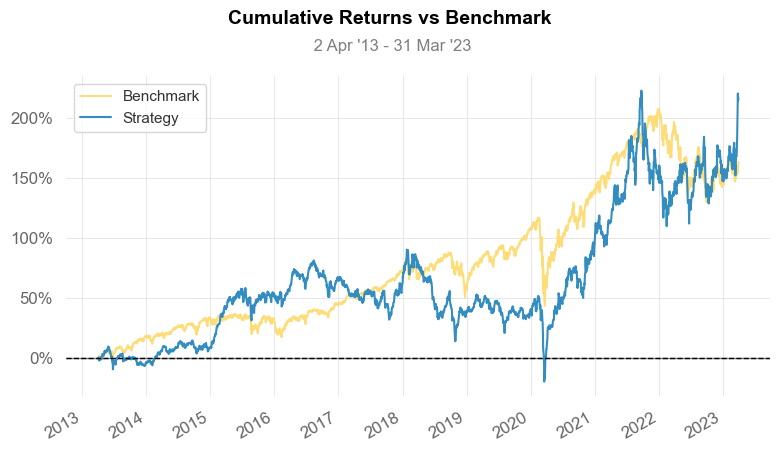

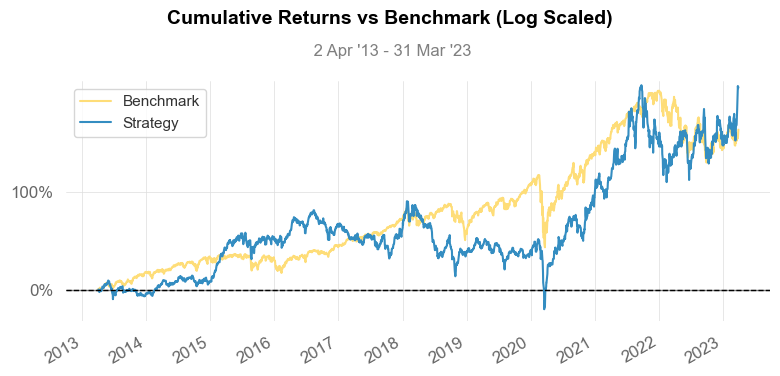

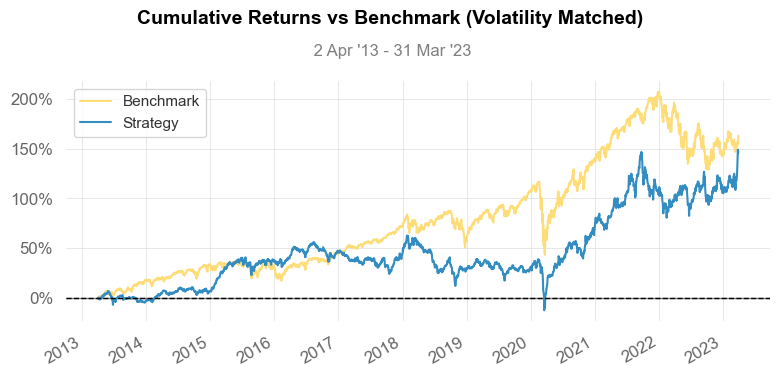

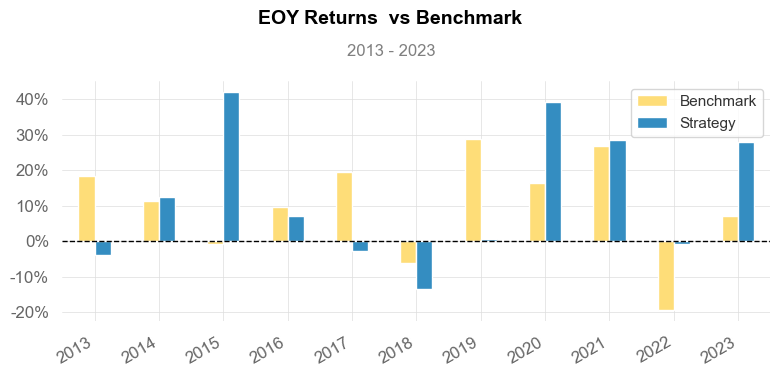

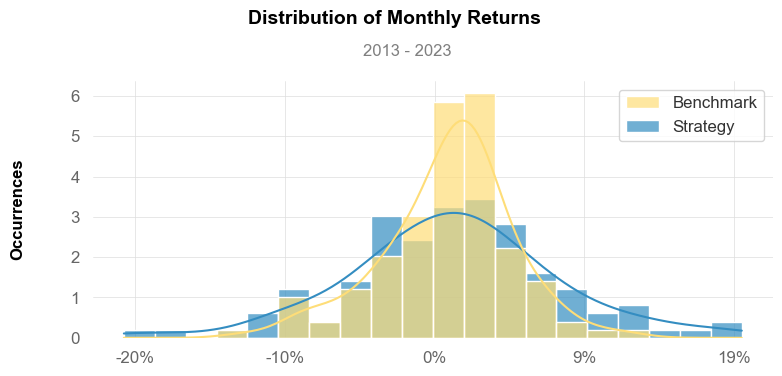

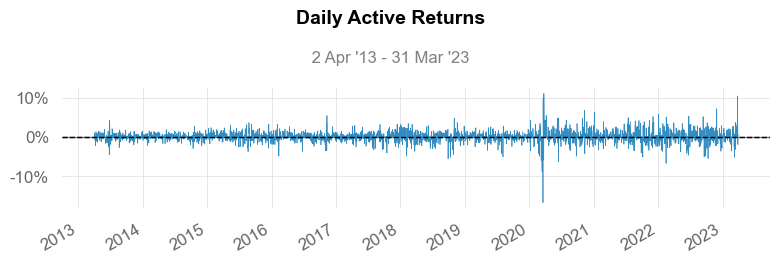

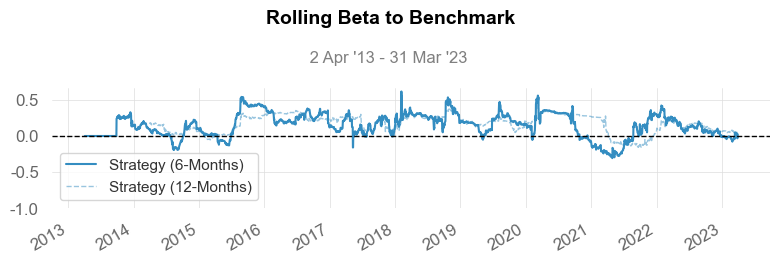

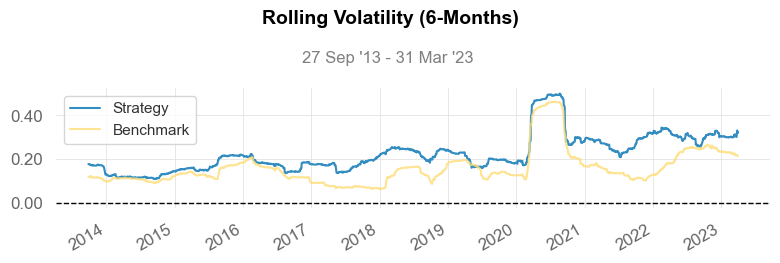

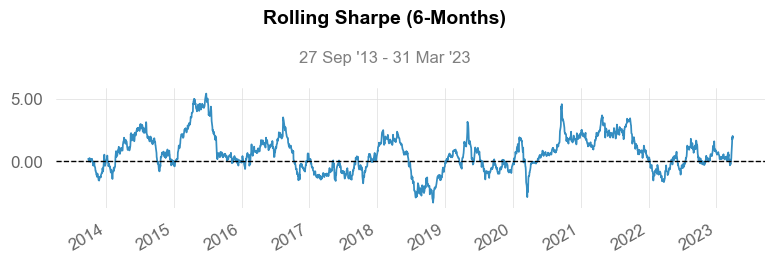

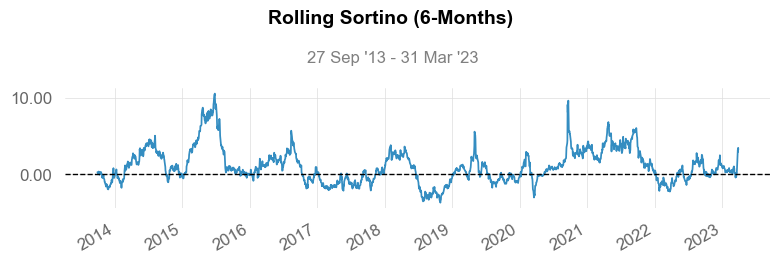

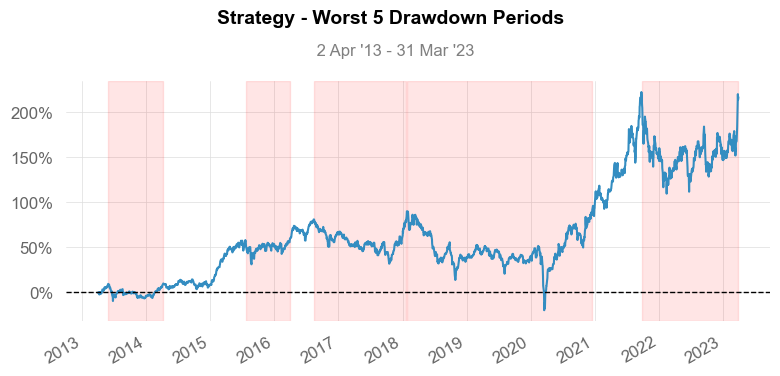

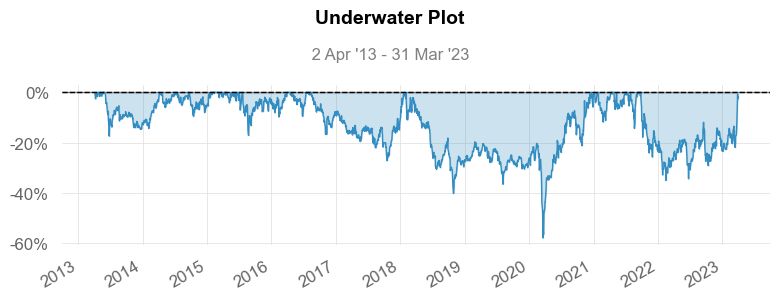

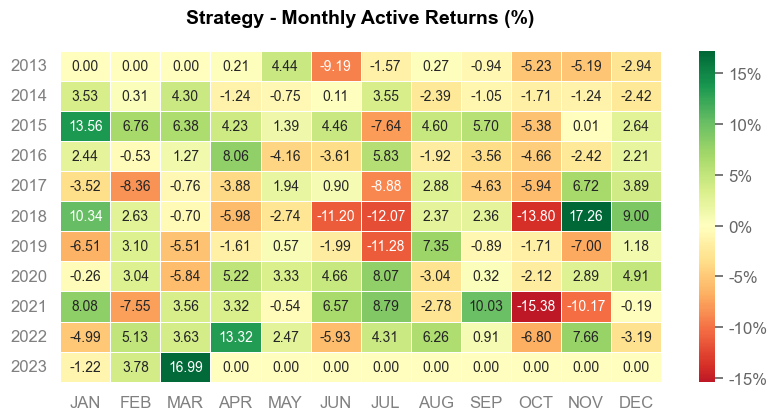

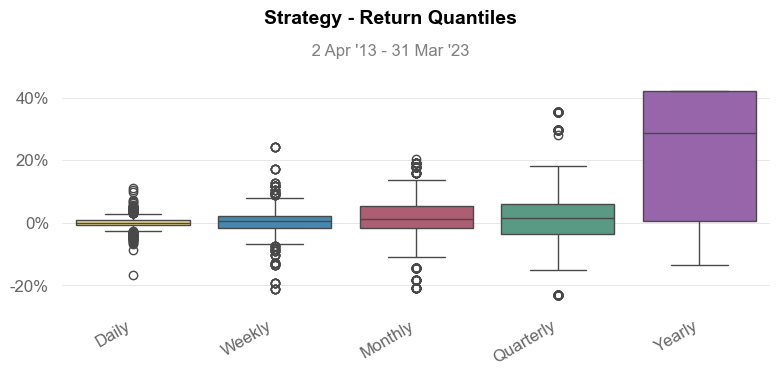

In [182]:
# qs.reports.full(rtns_pf['수익률'],sp['수익률'])
# qs.reports.full(rtns[method], rtns['kospi'])
# qs.reports.full(rtns[method], rtns['kosdaq'])
qs.reports.full(rtns[method], rtns['S&P500'])